In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("google_trends.csv")
df.head()


,date,Python,Java,AI
0,2010-01-31,0,180,0.0
1,2010-02-28,4,181,1.5
2,2010-03-31,8,182,3.0
3,2010-04-30,12,183,4.5
4,2010-05-31,16,184,6.0


In [3]:
df["date"] = pd.to_datetime(df["date"])


In [4]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    180 non-null    datetime64[ns]
 1   Python  180 non-null    int64         
 2   Java    180 non-null    int64         
 3   AI      180 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 5.8 KB


,date,Python,Java,AI
count,180,180.000000,180.000000,180.000000
mean,2017-07-15 18:16:00,103.000000,94.500000,134.250000
min,2010-01-31 00:00:00,0.000000,5.000000,0.000000
25%,2013-10-23 06:00:00,58.000000,49.750000,67.125000
50%,2017-07-15 12:00:00,103.000000,94.500000,134.250000
75%,2021-04-07 12:00:00,148.000000,139.250000,201.375000
max,2024-12-31 00:00:00,206.000000,184.000000,268.500000
std,NaN,53.286409,52.105662,78.158493


In [5]:
df.isna().sum()


date      0
Python    0
Java      0
AI        0
dtype: int64

In [6]:
df.fillna(0, inplace=True)


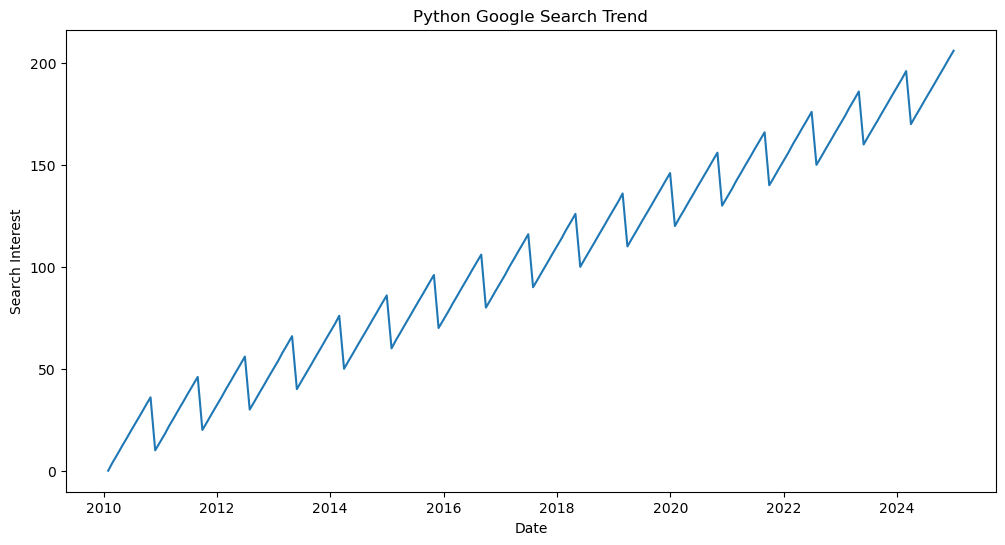

In [7]:
plt.figure(figsize=(12,6))
plt.plot(df["date"], df["Python"])
plt.xlabel("Date")
plt.ylabel("Search Interest")
plt.title("Python Google Search Trend")
plt.show()


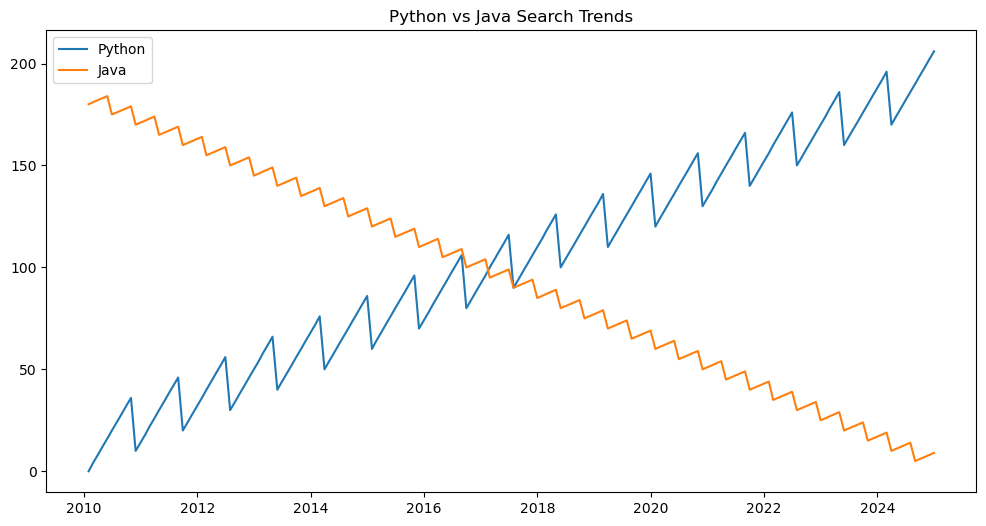

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df["date"], df["Python"], label="Python")
plt.plot(df["date"], df["Java"], label="Java")
plt.legend()
plt.title("Python vs Java Search Trends")
plt.show()


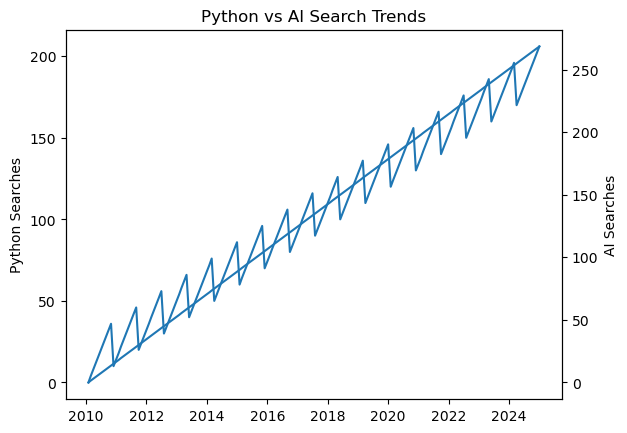

In [9]:
fig, ax1 = plt.subplots()

ax1.plot(df["date"], df["Python"])
ax1.set_ylabel("Python Searches")

ax2 = ax1.twinx()
ax2.plot(df["date"], df["AI"])
ax2.set_ylabel("AI Searches")

plt.title("Python vs AI Search Trends")
plt.show()


In [10]:
df["Python_rolling"] = df["Python"].rolling(window=12).mean()


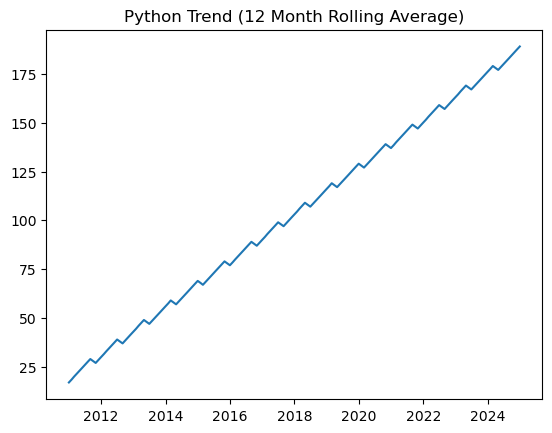

In [11]:
plt.plot(df["date"], df["Python_rolling"])
plt.title("Python Trend (12 Month Rolling Average)")
plt.show()


In [12]:
df.loc[df["Python"].idxmax()]


date              2024-12-31 00:00:00
Python                            206
Java                                9
AI                              268.5
Python_rolling                  189.0
Name: 179, dtype: object

In [13]:
df["year"] = df["date"].dt.year
yearly_avg = df.groupby("year").mean()
yearly_avg.head()


,date,Python,Java,AI,Python_rolling
year,,,,,
2010,2010-07-15 22:00:00,17.0,178.000000,8.25,17.000000
2011,2011-07-15 22:00:00,30.0,166.666667,26.25,25.291667
2012,2012-07-15 20:00:00,43.0,154.500000,44.25,37.458333
2013,2013-07-15 22:00:00,56.0,142.333333,62.25,49.625000
2014,2014-07-15 22:00:00,69.0,131.000000,80.25,61.791667


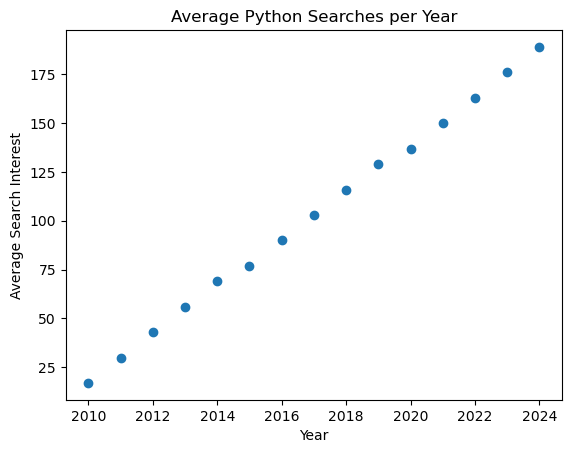

In [14]:
plt.scatter(yearly_avg.index, yearly_avg["Python"])
plt.xlabel("Year")
plt.ylabel("Average Search Interest")
plt.title("Average Python Searches per Year")
plt.show()
